<a href="https://colab.research.google.com/github/byronacunia/Linear/blob/main/Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read Data

In [ ]:
!git clone https://github.com/byronacunia/Linear.git

Cloning into 'Linear'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 53 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (53/53), done.


In [ ]:
import pandas as pd

In [ ]:
X =  pd.read_csv("/content/Linear/X_DF.csv")
y =  pd.read_csv("/content/Linear/Y_Vmag_DF.csv")

In [ ]:
X.shape

(1500, 689)

In [ ]:
y.shape

(1500, 156)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(1005, 689)

In [ ]:
H = np.zeros((y_train.shape[1], X_train.shape[1]+1)) # Pre-allocate matrix

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
for i in range(y_train.shape[1]):
  ytreino=y_train.iloc[:, [i]].to_numpy()
  lr = LinearRegression()
  lr.fit(X_train, ytreino)
  coef=lr.coef_
  bias=lr.intercept_
  row = np.hstack((bias.reshape(1,1),coef))
  H[i,:] = row

In [ ]:
MSE=[]
from sklearn.metrics import mean_squared_error

In [ ]:
for i in range(X_test.shape[0]):
  xTeste=X_test.iloc[[i],:].to_numpy()
  #xTeste=X_test[[i],:] #Cuando se escala
  xTeste=np.vstack((1,xTeste.T))
  y_pred=np.matmul(H,xTeste)
  y_true = y_test.iloc[[i],:].to_numpy()
  MSE.append(mean_squared_error(y_true.T, y_pred))

In [ ]:
np.max(MSE)

1798.1476983115776

In [ ]:
np.mean(MSE)

18.014540555413305

In [ ]:
np.min(MSE)

0.03323445761870875

In [ ]:
for i in range(y_train.shape[1]):
  ytreino=y_train.iloc[:, [i]].to_numpy()
  #ytreino=y_train[:, [i]] ##Cuando se escala
  biass = np.ones((X_train.shape[0],1))
  phi = np.hstack((biass, X_train))
  w = np.linalg.lstsq(np.matmul(phi.T,phi), np.matmul(phi.T,ytreino),rcond=None)
  row=w[0]
  H[i,:] = row.T

In [ ]:
#YPredictions = np.zeros((y_test.shape[1], y_test.shape[0])) # Pre-allocate matrix
MSE=[]
from sklearn.metrics import mean_squared_error

In [ ]:
for i in range(X_test.shape[0]):
  xTeste=X_test.iloc[[i],:].to_numpy()
  #xTeste=X_test[[i],:] #Cuando se escala
  xTeste=np.vstack((1,xTeste.T))
  y_pred=np.matmul(H,xTeste)
  y_true = y_test.iloc[[i],:].to_numpy()
  MSE.append(mean_squared_error(y_true.T, y_pred))
  

In [ ]:
np.max(MSE)

27.870505883848626

In [ ]:
np.mean(MSE)

2.167625965115265

In [ ]:
np.min(MSE)

0.0071578550626425815

In [ ]:
aux=np.array(MSE)

In [ ]:
aux = aux.reshape(aux.shape[0],1)

In [ ]:
aux1 = np.hstack((aux,aux))

In [ ]:
aux1.shape

(495, 2)

In [ ]:
aux1

array([[8.72402075e-01, 8.72402075e-01],
       [4.60518108e-01, 4.60518108e-01],
       [1.57116398e-01, 1.57116398e-01],
       [2.06262173e+00, 2.06262173e+00],
       [2.28671317e+00, 2.28671317e+00],
       [1.46963209e-01, 1.46963209e-01],
       [6.91541462e-02, 6.91541462e-02],
       [6.09404323e-01, 6.09404323e-01],
       [2.14470813e-02, 2.14470813e-02],
       [1.41831556e-01, 1.41831556e-01],
       [1.81154872e+00, 1.81154872e+00],
       [3.75546108e+00, 3.75546108e+00],
       [3.04090505e+00, 3.04090505e+00],
       [1.73454653e+00, 1.73454653e+00],
       [3.94785361e-01, 3.94785361e-01],
       [2.14568351e-01, 2.14568351e-01],
       [4.24527642e-02, 4.24527642e-02],
       [1.88640518e+00, 1.88640518e+00],
       [3.72142815e+00, 3.72142815e+00],
       [2.78821893e-02, 2.78821893e-02],
       [8.67293037e-02, 8.67293037e-02],
       [1.13399790e+00, 1.13399790e+00],
       [4.91855342e-01, 4.91855342e-01],
       [1.34611727e-02, 1.34611727e-02],
       [2.297183

In [74]:
MSE =  pd.read_csv("/content/MSE_1.csv")

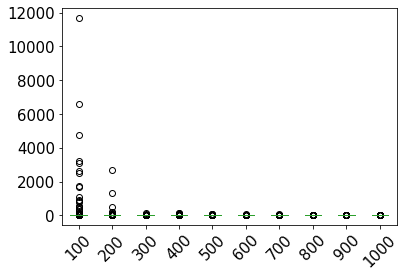

In [78]:
MSE.boxplot(grid=False, rot=45, fontsize=15)

In [102]:
import seaborn as sns

Text(0.5, 1.0, 'MSE')

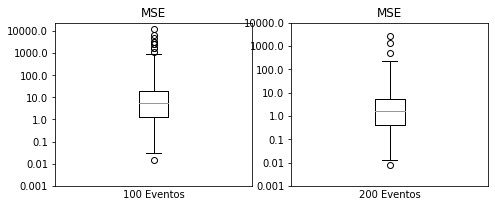

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

values = MSE.iloc[:, [0]].to_numpy()

fig = plt.figure(figsize=(12, 3))

ax = plt.subplot(1, 3, 1)
ax.boxplot(np.log10(values))
ax.set_xticks(np.arange(100, 100))
ax.set_xlabel("100 Eventos")
ax.set_yticks(np.arange(-3, 5))
ax.set_yticklabels(10.0**np.arange(-3, 5))
ax.set_title('MSE')

values = MSE.iloc[:, [1]].to_numpy()
ax = plt.subplot(1, 3, 2)
ax.boxplot(np.log10(values))
ax.set_xticks(np.arange(100, 100))
ax.set_xlabel("200 Eventos")
ax.set_yticks(np.arange(-3, 5))
ax.set_yticklabels(10.0**np.arange(-3, 5))
ax.set_title('MSE')

In [106]:

data_1 = np.random.normal(100, 10, 200)

In [108]:
data_1.shape

(200,)

In [109]:
data_2.shape

(495, 1)

In [142]:
MSE.shape

(495, 10)

In [146]:
MSEaux=MSE

In [150]:
MSE=MSEaux

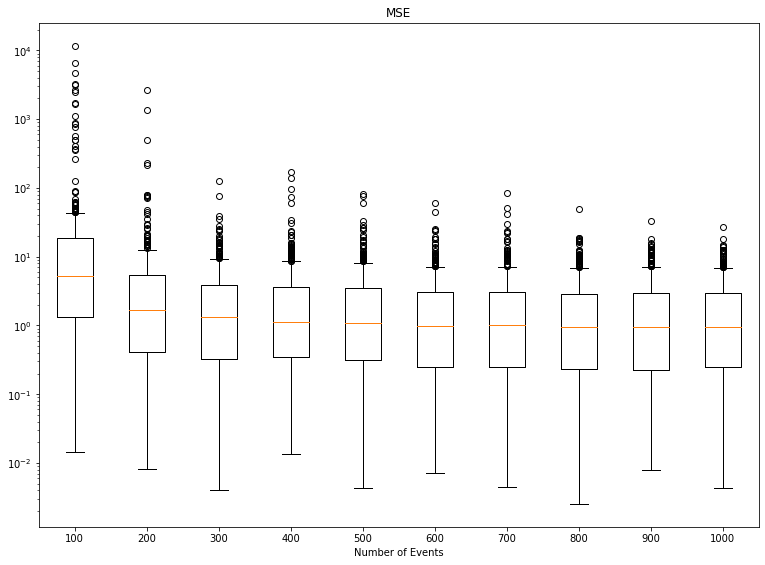

In [151]:
# Creating dataset
data_1 = MSE.iloc[:, [0]].to_numpy().reshape(MSE.shape[0])
data_2 = MSE.iloc[:, [1]].to_numpy().reshape(MSE.shape[0])
data_3 = MSE.iloc[:, [2]].to_numpy().reshape(MSE.shape[0])
data_4 = MSE.iloc[:, [3]].to_numpy().reshape(MSE.shape[0])
data_5 = MSE.iloc[:, [4]].to_numpy().reshape(MSE.shape[0])
data_6 = MSE.iloc[:, [5]].to_numpy().reshape(MSE.shape[0])
data_7 = MSE.iloc[:, [6]].to_numpy().reshape(MSE.shape[0])
data_8 = MSE.iloc[:, [7]].to_numpy().reshape(MSE.shape[0])
data_9 = MSE.iloc[:, [8]].to_numpy().reshape(MSE.shape[0])
data_10 = MSE.iloc[:, [9]].to_numpy().reshape(MSE.shape[0])
data = [data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9, data_10]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticks([1, 2, 3, 4])  # Set label locations.
ax.set_yscale('log')
ax.set_title('MSE')
ax.set_xlabel("Number of Events")
# Creating plot
bp = ax.boxplot(data)

plt.setp(ax, xticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
         xticklabels=['100', '200', '300', '400', '500', '600', '700', '800', '900', '1000'])

 
# show plot
plt.show()

In [ ]:
from sklearn.metrics import explained_variance_score

In [ ]:
explained_variance_score(yteste, y_pred)

0.9999801725177312

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalerY = MinMaxScaler()
scalerY.fit_transform(y_train)
y_train = scalerY.transform(y_train)
y_test = scalerY.transform(y_test)
scaler = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train=y_train.iloc[:, [0]].to_numpy()

In [ ]:
y_test=y_test.iloc[:, [0]].to_numpy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalerY = MinMaxScaler()

In [ ]:
scalerY.fit_transform(y_train)

array([[0.50548551],
       [0.67226647],
       [0.27485488],
       ...,
       [0.26748226],
       [0.38844344],
       [0.66288201]])

In [ ]:
y_train = scalerY.transform(y_train)

In [ ]:
y_test = scalerY.transform(y_test)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit_transform(X_train)

array([[0.52352422, 0.52706854, 0.53104243, ..., 0.4368889 , 0.53368103,
        0.41498061],
       [0.35370663, 0.35442905, 0.3629213 , ..., 0.46540669, 0.52444766,
        0.37326091],
       [0.76512103, 0.76615548, 0.76986573, ..., 0.81281443, 0.19465141,
        0.23806142],
       ...,
       [0.75402784, 0.76123657, 0.75737775, ..., 0.70127773, 0.26316468,
        0.36823256],
       [0.63165945, 0.63407372, 0.64725065, ..., 0.74759539, 0.20685194,
        0.37667524],
       [0.32137167, 0.3139355 , 0.31648889, ..., 0.66304514, 0.3211694 ,
        0.33288653]])

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.coef_.shape

(1, 689)

In [ ]:
reg.score(X_train, y_train)

0.9999999999994932

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import explained_variance_score

In [ ]:
y_true=y_test

In [ ]:
explained_variance_score(y_test, y_pred)

0.9999999999828041

In [ ]:
from sklearn.metrics import max_error

In [ ]:
max_error(y_true, y_pred)

1.0533622116781771e-05

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_true, y_pred)

6.99322646885941e-07

1.6276145938777176e-12

In [ ]:
X_train.iloc[[0],:]

,Vsource.source.bus_0115.1.2.3.1,Vsource.source.bus_0115.1.2.3.2,Vsource.source.bus_0115.1.2.3.3,Line.line_0115_0116.bus_0115.1,Line.line_0115_0116.bus_0115.2,Line.line_0115_0116.bus_0115.3,Line.line_0116_0133.bus_0116.1,Line.line_0116_0133.bus_0116.2,Line.line_0116_0133.bus_0116.3,Line.line_0121_0122.bus_0121.1,Line.line_0121_0122.bus_0121.2,Line.line_0121_0122.bus_0121.3,Line.line_0121_0133.bus_0121.1,Line.line_0121_0133.bus_0121.2,Line.line_0121_0133.bus_0121.3,Line.line_0122_0130.bus_0122.1,Line.line_0122_0130.bus_0122.2,Line.line_0122_0130.bus_0122.3,Line.line_0123_0124.bus_0123.1,Line.line_0123_0124.bus_0123.2,Line.line_0123_0124.bus_0123.3,Line.line_0124_0131.bus_0124.1,Line.line_0124_0131.bus_0124.2,Line.line_0124_0131.bus_0124.3,Line.line_0125_0126.bus_0125.1,Line.line_0125_0126.bus_0125.2,Line.line_0125_0126.bus_0125.3,Line.line_0126_0162.bus_0126.1,Line.line_0126_0162.bus_0126.2,Line.line_0126_0162.bus_0126.3,Line.line_0127_0125.bus_0127.1,Line.line_0127_0125.bus_0127.2,Line.line_0127_0125.bus_0127.3,Line.line_0127_0128.bus_0127.1,Line.line_0127_0128.bus_0127.2,Line.line_0127_0128.bus_0127.3,Line.line_0129_0127.bus_0129.1,Line.line_0129_0127.bus_0129.2,Line.line_0129_0127.bus_0129.3,Line.line_0130_0129.bus_0130.1,...,Transformer.tr__ginasio_multidisciplinar_2.bus_0137.3.2,Transformer.tr__biblioteca_bora.bus_0172.1.2,Transformer.tr__biblioteca_bora.bus_0172.2.2,Transformer.tr__biblioteca_bora.bus_0172.3.2,Transformer.tr__eletroposto.bus_0174.1.2,Transformer.tr__eletroposto.bus_0174.2.2,Transformer.tr__eletroposto.bus_0174.3.2,Transformer.tr_armazenamento_energia.bus_0171.1.2,Transformer.tr_armazenamento_energia.bus_0171.2.2,Transformer.tr_armazenamento_energia.bus_0171.3.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.1.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.2.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.3.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.1.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.2.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.3.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.1.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.2.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.3.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.1.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.2.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.3.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.1.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.2.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.3.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.1.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.2.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.3.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.1.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.2.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.3.2
591,65.997193,66.223097,66.58913,65.997193,66.223097,66.58913,65.997335,66.223185,66.589152,35.089937,35.465309,35.033252,35.089937,35.465309,35.033252,35.090171,35.465493,35.033347,29.886647,29.820909,30.602986,29.886766,29.820948,30.602965,26.508716,26.809393,26.384171,22.165108,22.418879,22.03781,26.508583,26.80928,26.384104,4.016133,4.088

In [ ]:
X_train.head(5)

,Vsource.source.bus_0115.1.2.3.1,Vsource.source.bus_0115.1.2.3.2,Vsource.source.bus_0115.1.2.3.3,Line.line_0115_0116.bus_0115.1,Line.line_0115_0116.bus_0115.2,Line.line_0115_0116.bus_0115.3,Line.line_0116_0133.bus_0116.1,Line.line_0116_0133.bus_0116.2,Line.line_0116_0133.bus_0116.3,Line.line_0121_0122.bus_0121.1,Line.line_0121_0122.bus_0121.2,Line.line_0121_0122.bus_0121.3,Line.line_0121_0133.bus_0121.1,Line.line_0121_0133.bus_0121.2,Line.line_0121_0133.bus_0121.3,Line.line_0122_0130.bus_0122.1,Line.line_0122_0130.bus_0122.2,Line.line_0122_0130.bus_0122.3,Line.line_0123_0124.bus_0123.1,Line.line_0123_0124.bus_0123.2,Line.line_0123_0124.bus_0123.3,Line.line_0124_0131.bus_0124.1,Line.line_0124_0131.bus_0124.2,Line.line_0124_0131.bus_0124.3,Line.line_0125_0126.bus_0125.1,Line.line_0125_0126.bus_0125.2,Line.line_0125_0126.bus_0125.3,Line.line_0126_0162.bus_0126.1,Line.line_0126_0162.bus_0126.2,Line.line_0126_0162.bus_0126.3,Line.line_0127_0125.bus_0127.1,Line.line_0127_0125.bus_0127.2,Line.line_0127_0125.bus_0127.3,Line.line_0127_0128.bus_0127.1,Line.line_0127_0128.bus_0127.2,Line.line_0127_0128.bus_0127.3,Line.line_0129_0127.bus_0129.1,Line.line_0129_0127.bus_0129.2,Line.line_0129_0127.bus_0129.3,Line.line_0130_0129.bus_0130.1,...,Transformer.tr__ginasio_multidisciplinar_2.bus_0137.3.2,Transformer.tr__biblioteca_bora.bus_0172.1.2,Transformer.tr__biblioteca_bora.bus_0172.2.2,Transformer.tr__biblioteca_bora.bus_0172.3.2,Transformer.tr__eletroposto.bus_0174.1.2,Transformer.tr__eletroposto.bus_0174.2.2,Transformer.tr__eletroposto.bus_0174.3.2,Transformer.tr_armazenamento_energia.bus_0171.1.2,Transformer.tr_armazenamento_energia.bus_0171.2.2,Transformer.tr_armazenamento_energia.bus_0171.3.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.1.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.2.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.3.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.1.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.2.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.3.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.1.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.2.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.3.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.1.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.2.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.3.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.1.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.2.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.3.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.1.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.2.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.3.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.1.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.2.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.3.2
591,65.997193,66.223097,66.589130,65.997193,66.223097,66.589130,65.997335,66.223185,66.589152,35.089937,35.465309,35.033252,35.089937,35.465309,35.033252,35.090171,35.465493,35.033347,29.886647,29.820909,30.602986,29.886766,29.820948,30.602965,26.508716,26.809393,26.384171,22.165108,22.418879,22.037810,26.508583,26.809280,26.384104,4.016133,4

In [ ]:
X_train.iloc[0:3,:]

,Vsource.source.bus_0115.1.2.3.1,Vsource.source.bus_0115.1.2.3.2,Vsource.source.bus_0115.1.2.3.3,Line.line_0115_0116.bus_0115.1,Line.line_0115_0116.bus_0115.2,Line.line_0115_0116.bus_0115.3,Line.line_0116_0133.bus_0116.1,Line.line_0116_0133.bus_0116.2,Line.line_0116_0133.bus_0116.3,Line.line_0121_0122.bus_0121.1,Line.line_0121_0122.bus_0121.2,Line.line_0121_0122.bus_0121.3,Line.line_0121_0133.bus_0121.1,Line.line_0121_0133.bus_0121.2,Line.line_0121_0133.bus_0121.3,Line.line_0122_0130.bus_0122.1,Line.line_0122_0130.bus_0122.2,Line.line_0122_0130.bus_0122.3,Line.line_0123_0124.bus_0123.1,Line.line_0123_0124.bus_0123.2,Line.line_0123_0124.bus_0123.3,Line.line_0124_0131.bus_0124.1,Line.line_0124_0131.bus_0124.2,Line.line_0124_0131.bus_0124.3,Line.line_0125_0126.bus_0125.1,Line.line_0125_0126.bus_0125.2,Line.line_0125_0126.bus_0125.3,Line.line_0126_0162.bus_0126.1,Line.line_0126_0162.bus_0126.2,Line.line_0126_0162.bus_0126.3,Line.line_0127_0125.bus_0127.1,Line.line_0127_0125.bus_0127.2,Line.line_0127_0125.bus_0127.3,Line.line_0127_0128.bus_0127.1,Line.line_0127_0128.bus_0127.2,Line.line_0127_0128.bus_0127.3,Line.line_0129_0127.bus_0129.1,Line.line_0129_0127.bus_0129.2,Line.line_0129_0127.bus_0129.3,Line.line_0130_0129.bus_0130.1,...,Transformer.tr__ginasio_multidisciplinar_2.bus_0137.3.2,Transformer.tr__biblioteca_bora.bus_0172.1.2,Transformer.tr__biblioteca_bora.bus_0172.2.2,Transformer.tr__biblioteca_bora.bus_0172.3.2,Transformer.tr__eletroposto.bus_0174.1.2,Transformer.tr__eletroposto.bus_0174.2.2,Transformer.tr__eletroposto.bus_0174.3.2,Transformer.tr_armazenamento_energia.bus_0171.1.2,Transformer.tr_armazenamento_energia.bus_0171.2.2,Transformer.tr_armazenamento_energia.bus_0171.3.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.1.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.2.2,Load.transformer_tr__ginasio_multidisciplinar_2.bus_0137_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_central_2.bus_0132_bt.1.2.3.4.3.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.1.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.2.2,Load.transformer_tr__fef_1_quadras_e_vestiarios.bus_0128_bt.1.2.3.4.3.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.1.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.2.2,Load.transformer_tr__iluminacao_publica_1.bus_0126_bt.1.2.3.4.3.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.1.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.2.2,Load.transformer_tr__iluminacao_publica_2.bus_0123_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_central_1.bus_0132_bt.1.2.3.4.3.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.1.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.2.2,Load.transformer_tr__ginasio_multidisciplinar_1.bus_0137_bt.1.2.3.4.3.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.1.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.2.2,Load.transformer_tr__biblioteca_bora.bus_0172_bt.1.2.3.4.3.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.1.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.2.2,Load.transformer_tr__eletroposto.bus_0174_bt.1.2.3.4.3.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.1.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.2.2,Generator.geracao_pv_gmu.bus_0137_bt2.1.2.3.4.3.2
591,65.997193,66.223097,66.589130,65.997193,66.223097,66.589130,65.997335,66.223185,66.589152,35.089937,35.465309,35.033252,35.089937,35.465309,35.033252,35.090171,35.465493,35.033347,29.886647,29.820909,30.602986,29.886766,29.820948,30.602965,26.508716,26.809393,26.384171,22.165108,22.418879,22.037810,26.508583,26.809280,26.384104,4.016133,4

In [ ]:
X_train.shape

(1005, 689)

In [ ]:
for i in range(100,X_train.shape[0],100):
  print(i)

100
200
300
400
500
600
700
800
900
1000


range(100, 1005, 100)